# Multi Period Returns

In [1]:
prices_a = [10, 15, 13, 9]
prices_a[1:]  # everything except the first one
prices_a[:-1]  # everything except the last one

[10, 15, 13]

In [2]:
import numpy as np

In [3]:
prices = np.array(prices_a)
prices

array([10, 15, 13,  9])

In [4]:
# it works because we are working with numpy arrays.
prices[1:] / prices[:-1] - 1

array([ 0.5       , -0.13333333, -0.30769231])

In [5]:
import pandas as pd

In [6]:
prices = pd.DataFrame({"BLUE": [1, 2, 3], "ORANGE": [4, 5, 6]})
prices

,BLUE,ORANGE
0,1,4
1,2,5
2,3,6


## Method 1: values()

In [7]:
prices.iloc[1:].values / prices.iloc[:-1] - 1

,BLUE,ORANGE
0,1.0,0.25
1,0.5,0.20


In [8]:
prices.iloc[1:] / prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,1.0,0.25
2,0.5,0.20


## Method 2: shift()

In [9]:
prices / prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,1.0,0.25
2,0.5,0.20


## Method 3: pct_change()

In [10]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,1.0,0.25
2,0.5,0.20


In [11]:
import yfinance as yf

In [12]:
msft = yf.Ticker("MSFT")
prices = pd.DataFrame(msft.history(period="1mo")['Close'])
prices.reset_index(inplace=True)
prices['Date'] = prices['Date'].dt.date
prices.set_index('Date', inplace=True)
prices.head()

,Close
Date,
2023-06-08,325.260010
2023-06-09,326.790009
2023-06-12,331.850006
2023-06-13,334.290009
2023-06-14,337.339996


In [13]:
returns = prices.pct_change()

<Axes: xlabel='Date'>

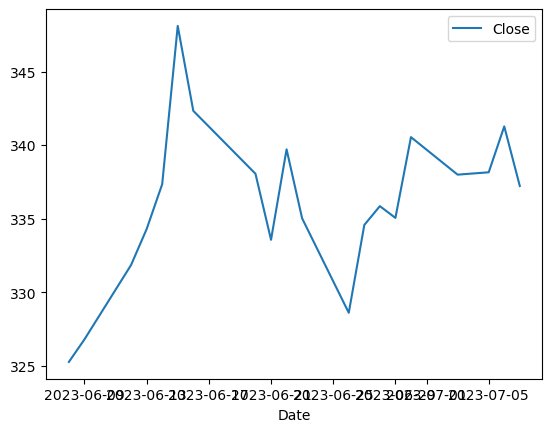

In [14]:
prices.plot()

<Axes: xlabel='Date'>

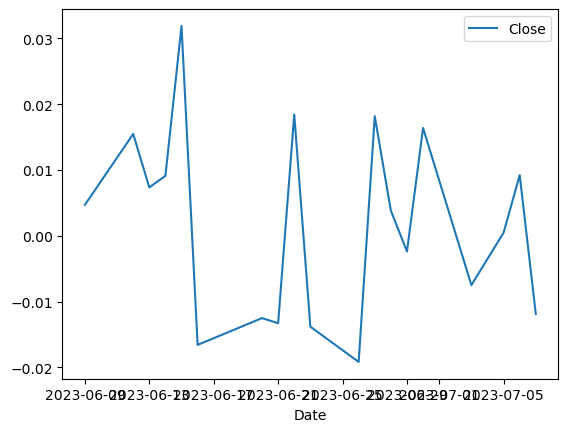

In [15]:
returns.plot()

<Axes: xlabel='Date'>

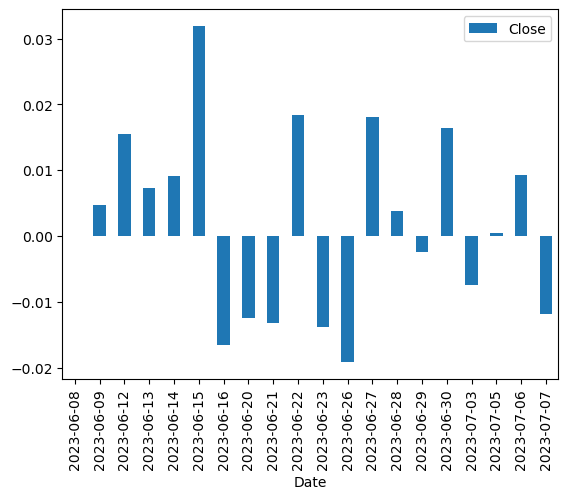

In [16]:
returns.plot.bar()

In [17]:
returns.std()

Close    0.014428
dtype: float64

In [18]:
returns.mean()

Close    0.002001
dtype: float64

# Annualized Returns

In [19]:
(returns + 1).dropna().head()  # dropna() drops NaN rows

,Close
Date,
2023-06-09,1.004704
2023-06-12,1.015484
2023-06-13,1.007353
2023-06-14,1.009124
2023-06-15,1.031897


In [20]:
np.prod(returns + 1)  # multiply each column

Close    1.036771
dtype: float64

In [21]:
compound_return = np.prod(returns + 1) - 1
compound_return

Close    0.036771
dtype: float64

In [22]:
(returns + 1).prod() - 1

Close    0.036771
dtype: float64

In [23]:
monthly_ret = 0.01
((1 + monthly_ret)**12 - 1) * 100

12.682503013196978

In [24]:
quarterly_ret = 0.04
((1 + quarterly_ret)**4 - 1) * 100

16.98585600000002

In [25]:
daily_ret = 0.0001
(1 + daily_ret)**252 - 1

0.025518911987694626

In [26]:
(returns + 1).dropna().head()  # dropna() drops NaN rows

np.prod(returns + 1)  # multiply each column

compound_return = np.prod(returns + 1) - 1
compound_return

(returns + 1).prod() - 1

monthly_ret = 0.01
((1 + monthly_ret)**12 - 1) * 100

quarterly_ret = 0.04
((1 + quarterly_ret)**4 - 1) * 100

daily_ret = 0.0001
(1 + daily_ret)**252 - 1

0.025518911987694626

# Variance and Standard Deviation

In [27]:
returns.std()

Close    0.014428
dtype: float64

In [28]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)  # variance**0.5
volatility

Close    0.014043
dtype: float64

The two values don't match exactly. `std()` method uses $N-1$ while our method uses $N$ when we compute `mean()`. In other words, there is a difference between Sample STD and Population STD.

In [29]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
num_obs = returns.dropna().shape[0]
variance = squared_deviations.sum() / (num_obs - 1)
volatility = np.sqrt(variance)
volatility

Close    0.014428
dtype: float64

In [30]:
returns.std()

Close    0.014428
dtype: float64

We can confirm that now the two values are matched with $0.014428$.

# Annualized Volatility

In [31]:
returns.std() * np.sqrt(252)

Close    0.229035
dtype: float64

In [32]:
returns.std() * (252**0.5)

Close    0.229035
dtype: float64

# Fama French: Large Cap vs. Small Cap

In [33]:
returns = pd.read_csv(
    "data/Portfolios_Formed_on_ME_monthly_EW.csv",
    header=0,
    index_col=0,
    parse_dates=True,
    na_values=-99.99)
columns = ['Lo 10', 'Hi 10']
returns = returns[columns] / 100
returns.columns = ['SmallCap', 'LargeCap']  # change column names
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<Axes: >

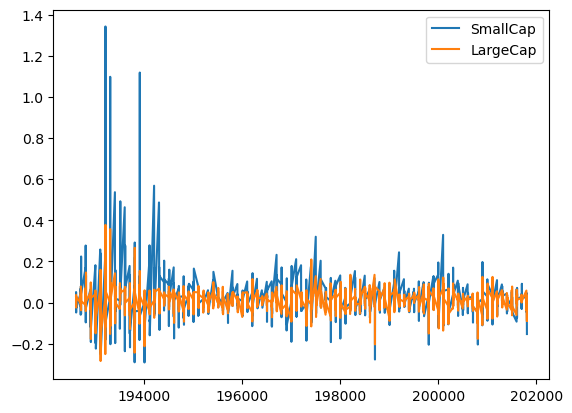

In [34]:
returns.plot.line()

In [35]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [36]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [37]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1 / n_months) - 1  # return per month
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [38]:
annualized_return = (return_per_month + 1)**12 - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [39]:
annualized_return = (returns+1).prod()**(12/n_months) - \
    1  # simpler way of computing annualized return
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [40]:
annualized_return / annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [41]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

## Maximum Drawdown

In [43]:
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

### pd.to_datetime()

In [44]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


### to_period('M')

In [45]:
returns.index = returns.index.to_period('M')
returns.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [46]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [47]:
returns['1926']

/var/folders/y3/vq18fv8j6w92wn2rsh67why40000gn/T/ipykernel_96530/1509533259.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  returns['1926']


,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
1926-12,-0.0266,0.0301


In [48]:
returns.loc['1926']

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
1926-12,-0.0266,0.0301


In [49]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


### Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value as a percentage of the previous peak

In [53]:
wealth_index = 1000 * (1 + returns['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

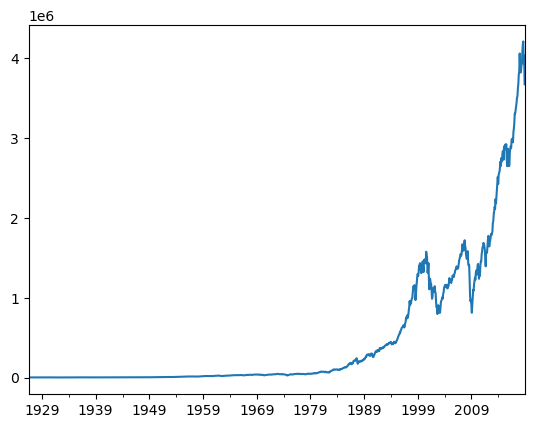

In [54]:
wealth_index.plot.line()

<Axes: >

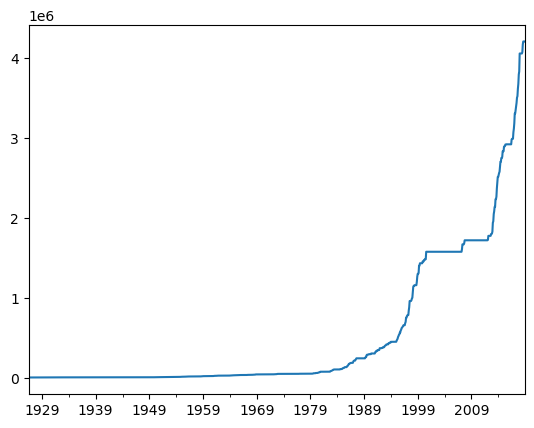

In [55]:
prev_peaks = wealth_index.cummax()
prev_peaks.plot()

<Axes: >

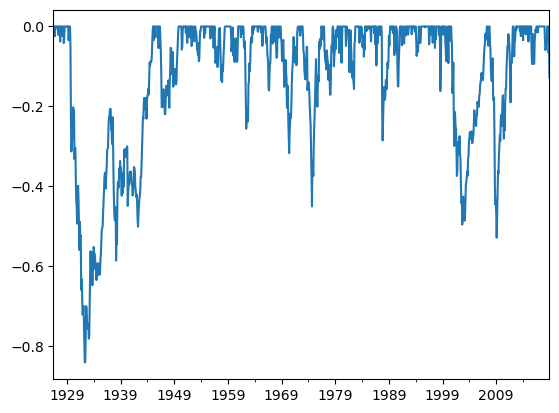

In [56]:
drawdown = (wealth_index - prev_peaks) / prev_peaks
drawdown.plot()

In [61]:
mdd = drawdown.min()  # max drawdown since the beginning
mdd

-0.8400375277943123

In [68]:
drawdown['1975':].min()  # max drawdown since 1975

-0.5280945042309304

In [69]:
drawdown.idxmin()

Period('1932-05', 'M')

### Drawdown Function

In [70]:
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percentage drawdown
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    prev_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - prev_peaks) / prev_peaks
    return pd.DataFrame({
        'Wealth': wealth_index,
        "Peaks": prev_peaks,
        "Drawdown": drawdowns
    })

In [75]:
drawdown(returns['LargeCap']).round(2)

,Wealth,Peaks,Drawdown
1926-07,1032.90,1032.90,0.00
1926-08,1071.12,1071.12,0.00
1926-09,1078.29,1078.29,0.00
1926-10,1052.09,1078.29,-0.02
1926-11,1080.50,1080.50,0.00
...,...,...,...
2018-08,4175915.15,4175915.15,0.00
2018-09,4212245.61,4212245.61,0.00
2018-10,3935501.07,4212245.61,-0.07
2018-11,4035069.25,4212245.61,-0.04


<Axes: >

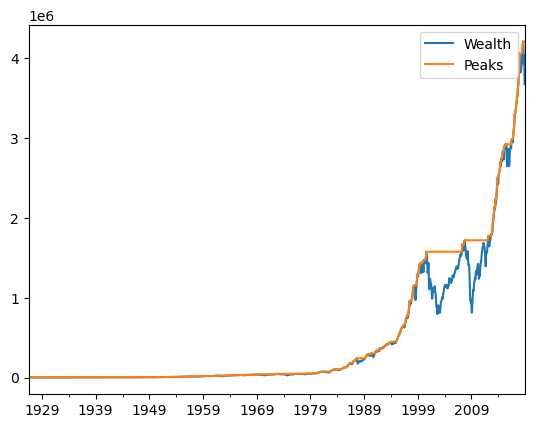

In [79]:
drawdown(returns['LargeCap'])[['Wealth', 'Peaks']].round(3).plot()